Done Section 1/5
Logging in the system.
Done Section 2/5
Creating the execution. 
Execution name: EFF_DICTAT-BL_d01-tgpzffuskr 
Execution ID: 33527
Starting the execution.
Execution started. 
Done Section 3/5
Still in RUNNING state. 
Still in RUNNING state. 
New state:FINISHED
Done Section 4/5
Getting output VOTable.
Done Section 5/5
Finished Execution Computations
 
 
Start of output processing script.
Start of data aquisition...
Reading data names...
Reading data units...
Reading data values...
End of data aquisition...
Start of data presenting...
 
 
Select x-axis data...
1 -- maxEfield [V.m-1] 
2 -- time [hr] 
3 -- surfVoltage [V] 
4 -- integralIntensity [cm-2.s-1] 
5 -- energy [MeV] 
6 -- flowingCurrent [A.m-2] 
7 -- depositedCurrent [A.m-2] 
8 -- protonDoseRate [Rads.s-1] 
9 -- electricField [V.m-1] 
10 -- integralIntensity [cm-2.s-1] 
11 -- energy [MeV] 
12 -- time [hr] 
13 -- maxEfield [V.m-1] 
14 -- surfVoltage [V] 
15 -- electricField [V.m-1] 
16 -- flowingCurrent [A.m-2] 
17

<IPython.core.display.Javascript object>


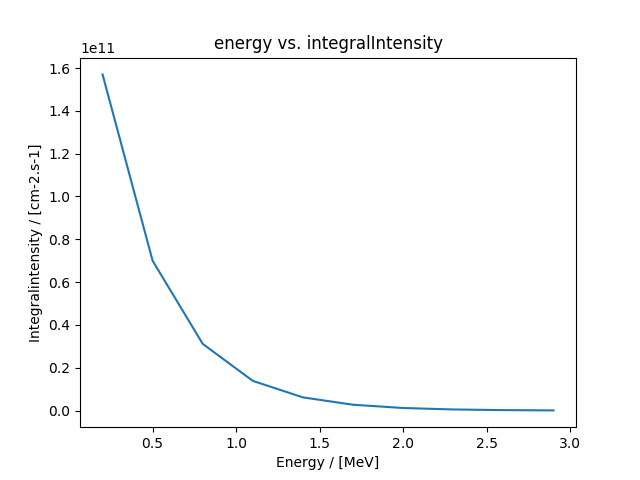

End of data presenting...


In [2]:
### Import necessary packages and create a esecution key to ensure that the execution has a unique name 

import sapi
import random
import string
import time
import sys

def randomword(length):
    return ''.join(random.choice(string.lowercase) for i in range(length))

# Print a finish message
print "Done Section 1/5"

### Setup the input parametres in order to run the execution

# Some variables must be defined by the user here.
## User name. Should be the same than the one in the config file.
username = 'atamanje'

##  Project  name  where  the  execution  is  to  be  saved.  The  project  must already exists.
prjname = 'API_learning'

## Path to the workflow to be executed. Can be public or private. 
## The path can be checked using the HMI, in the "Workflow" menu.
workflow = '/common/workflows/EFF_DICTAT-BL_d01'

## Name of the execution. Here we use a fixed part and a random alphabetic section. 
## This is done to produce unique names for each script execution and avoid collisions.
execname = 'EFF_DICTAT-BL_d01-' + randomword(10)

## VOTable containing the input data necessary for the execution.
votFile = 'EFF_DICTAT-BL_d01_input.xml'

## XML file containing the links between the required parameters to start 
## an execution and the associated resource in the input VOT.
## The text @path@ will be replaced by the actual path automatically.
datamodel = 'EFF_DICTAT-BL_d01_datamodel.xml'

# End of user-defined variables.
# Log in
print("Logging in the system.")
s = sapi.Session("global.conf", "")
s.readglobalconfig()
ssn = s.login()

# Print a finish message
print "Done Section 2/5"

### Create and start the execution. Print out relavent information

# Create execution.
print "Creating the execution. "
myId=s.createExecution(ssn, username, prjname, execname, workflow, votFile, datamodel)

# Print the execution ID returned. Can be useful to check in the HMI.
print "Execution name: " + execname + " "
print "Execution ID: " + str(myId)

# Start execution
print "Starting the execution."
sys.stdout.flush()
s.startExecution(ssn, myId)
sys.stdout.flush()
print "Execution started. "

# Print a finish message
print "Done Section 3/5"

### Continue to check the status of the running execution to see when the process(es) have finished

# Check status until not in RUNNING state. It could be FINISHED or ERROR. 
# It will be "WAITING_FOR_INPUTS" if the startExecution step didn't work. 
n = 0
while n < 100 : 
    n = n + 1
    status = s.getExecutionStatus(ssn, myId)
    if hasattr(status,'state'):
        if status.state == "RUNNING":
            print("Still in RUNNING state. ")
            time.sleep(1.0)
        else:
            print("New state:"+ status.state)
            break
    else:
        print "NO STATUS " + status
        break
# print n

# Print a finish message
print "Done Section 4/5"

### Gather output information and write it into a .vot file

# Get VOTable for the whole output information
print("Getting output VOTable.")
outputvot = s.getVOT(ssn, username, prjname, execname)

# Save the VOT to disk. It will be a zip file with all the content.
target = open('output_votable.zip','wb')
target.write(outputvot)
target.close()

# Print a finish message
print "Done Section 5/5"
print "Finished Execution Computations"
print " "
print " "

%matplotlib nbagg
import zipfile
import string
import numpy as np
import matplotlib.pyplot as plt
import datetime

#startDaT = "2011-01-01T00:00:00Z" #
#startDay = 1                      # Temporary, later will read the first
#startMth = 1                      # date and time value from the data
#startYer = 2011                   # 
#
#def readTime(stringTime):
#    # Function that computes time fromt a string formatted as above
#    # Currently doesn't take into account months and years
#    secs = float(stringTime[17:stringTime.index("Z")])
#    mins = float(stringTime[14:16])
#    hour = float(stringTime[11:13])
#    days = float(stringTime[8:10]) - startDay
#    mths = float(stringTime[5:7]) - startMth
#    year = float(stringTime[0:3]) - startYer
#    timeSec = days*86400 + hour*3600 + mins*60 + secs
#    return timeSec

class dataStore:
    def _init_(self,name,units):
        self.name = name
        self.units = units
        self.values = []
        print self.name + " in " + self.units
    
    def addData(array):
        self.values.append(array)
        print "Data added to " + self.name
        


print("Start of output processing script.")
print("Start of data aquisition...")

archive = zipfile.ZipFile('output_votable.zip', 'r')
VOTdata = archive.read('spenvis_export.vot')
archive.close()
noField = VOTdata.count("FIELD ID")

#print VOTdata_str[0:1000]
#print VOTdata.count("\n")
#print noField
print("Reading data names...")
n = 1
srt = 0

varNames = []
varUnits = []
while n <= noField : 
    #print n
    srt = VOTdata.index("FIELD ID",srt+8) - 1 
    end = VOTdata.index("\n",srt)
    nam_pos = VOTdata.index("name=",srt,end)
    ucd_pos = VOTdata.index("ucd=",srt,end)
    crtName = VOTdata[nam_pos+6:ucd_pos-2]
    #print varName
    varNames.append(crtName)
    n = n + 1
    
print("Reading data units...")
n = 0
srt = 0
while n <= noField-1 : 
    #print n
    srt = VOTdata.index("FIELD ID",srt+8) - 1 
    end = VOTdata.index("\n",srt)
    id_pos = VOTdata.index("ID=",srt,end)
    dt_pos = VOTdata.index("datatype=",srt,end)
    crtUnit = VOTdata[id_pos+48:dt_pos-2]
    #print crtUnit
    varUnits.append(crtUnit)
    n = n + 1
    
#print varNames
#print varUnits
#print VOTdata.index("<TABLEDATA>")
#print VOTdata.index("</TABLEDATA>")
#print VOTdata.count("<TD>")
#print VOTdata.count("</TD>")
#vals = [noField,VOTdata.count("TD")/8]
print("Reading data values...")
vals = []; i = 0; j = 0; srt = 0; end = 0
noIns = VOTdata.count("<TD>")/noField # number of instance of each data category
for i in range(0,noIns):
    for j in range(0,noField):
        srt = VOTdata.index("<TD>",end)
        end = VOTdata.index("</TD>",srt)
        #print j
        #print srt
        #print end
        #print varNames[j] + " = " + VOTdata[srt+4:end] + " "  + varUnits[j]
        j = j + 1 
        vals.append(VOTdata[srt+4:end])
    i = i + 1 
#print vals
#print VOTdata
#print vals
print("End of data aquisition...")
print("Start of data presenting...")
print " "
print " "

i = 0 # Counter to extract data from vals 
j = 0 # Counter to set values to correct row 
k = 0 # Counter to set values to correct col
spenvisData = np.zeros((1,noField,noIns)) # Creates a noField by noIns matrix

for i in range (0,len(vals)):
    # print "i = " + str(i) + " and j = " + str(j) + " and k = " + str(k) + " val is " + str(vals[i])
    if varUnits[j] == '':
        #print "Time"
        spenvisData[0,j,k] = readTime(vals[i])
    else:
        spenvisData[0,j,k] = float(vals[i])
    if j == noField-1:
        j = 0
        k = k + 1
    else:
        j = j + 1
    i = i + 1

print "Select x-axis data..."
i = 0
for i in range (0,noField):
    print str(i + 1) + " -- " + varNames[i] + " [" + varUnits[i] + "] "
xdataID = int(raw_input("..."))
print "Select y-axis data..."
print " "
print " "
i = 0
for i in range (0,noField):
    if i + 1 != xdataID:
        print str(i + 1) + " : " + varNames[i] + " [" + varUnits[i] + "] "
ydataID = int(raw_input("..."))

plt.figure()
plt.subplot(1, 1, 1)
plt.plot(spenvisData[0,xdataID-1,...],spenvisData[0,ydataID-1,...])
plt.xlabel(string.capitalize(varNames[xdataID-1]) + " / [" + varUnits[xdataID-1] + "]") # naming the x axis
plt.ylabel(string.capitalize(varNames[ydataID-1]) + " / [" + varUnits[ydataID-1] + "]") # naming the y axis
plt.title(varNames[xdataID - 1] + " vs. " + varNames[ydataID - 1]) # giving a title to my graph
#plt.show()
#print spenvisData
print("End of data presenting...")

In [2]:
class NGDATA:

    def __init__(self, name, unit, vals):
        self.name = name
        self.unit = unit    # creates a new empty list for each dog
        self.data = vals

    def add_trick(self, trick):
        self.tricks.append(trick)
        
#new = Dog("Fido")
#new.add_trick("roll over")

i = 0
for i in range (0,noField):
    new = NGDATA(varNames[i],varUnits[i],spenvisData[0,i,...])

print new.name, new.unit



protonDoseRate Rads.s-1


In [3]:
matrix = np.zeros((1,noField,noIns))
matrix[0,1,2] = 1
#print matrix
#print len(vals)/noField
print len(vals) 
print spenvisData

180
[[[  1.10010000e+06   1.78850000e+06   2.21650000e+06   2.48140000e+06
     2.64490000e+06   2.74560000e+06   2.80750000e+06   2.84560000e+06
     2.86900000e+06   2.88330000e+06]
  [  1.20000000e+00   2.40000000e+00   3.60000000e+00   4.80000000e+00
     6.00000000e+00   7.20000000e+00   8.40000000e+00   9.60000000e+00
     1.08000000e+01   1.20000000e+01]
  [  5.49980000e+02   8.96870000e+02   1.11440000e+03   1.25030000e+03
     1.33490000e+03   1.38760000e+03   1.42030000e+03   1.44060000e+03
     1.45320000e+03   1.46100000e+03]
  [  1.57020000e+11   6.99560000e+10   3.11670000e+10   1.38850000e+10
     6.18600000e+09   2.75600000e+09   1.22780000e+09   5.47010000e+08
     2.43700000e+08   1.08570000e+08]
  [  2.00000000e-01   5.00000000e-01   8.00000000e-01   1.10000000e+00
     1.40000000e+00   1.70000000e+00   2.00000000e+00   2.30000000e+00
     2.60000000e+00   2.90000000e+00]
  [  7.87800000e-10   1.44600000e-09   1.99000000e-09   2.44700000e-09
     2.82600000e-09   3.1